In [4]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
import warnings
warnings.filterwarnings("ignore",category = DeprecationWarning)
warnings.filterwarnings("ignore",category = FutureWarning)

In [10]:
df = pd.read_csv("diabetes.csv")

In [13]:
y = df["Outcome"]
X = df.drop(["Outcome"],axis=1)

In [17]:
X_train, X_test , y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size = 0.30,
                                                     random_state = 42)

In [19]:
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [21]:
rf_model

RandomForestClassifier()

In [24]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7445887445887446

### Model Tuning

In [27]:
rf = RandomForestClassifier()

In [31]:
X_train.shape

(537, 8)

In [33]:
rf_params = {"n_estimators" : [100,200,500,100],
             "max_features" : [3,5,7,8],
            "min_samples_split" : [2,5,10,20]}

In [37]:
rf_cv_model = GridSearchCV(rf, rf_params , cv=10 , n_jobs = -1, verbose = 2).fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV] END max_features=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_features=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_features=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_features=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_features=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_features=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_features=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_features=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_features=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_features=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_features=3, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=3,

In [38]:
rf_cv_model.best_params_

{'max_features': 8, 'min_samples_split': 5, 'n_estimators': 200}

In [41]:
#final model 

In [43]:
rf_tuned = RandomForestClassifier(max_features = 8, min_samples_split = 5, n_estimators = 500).fit(X_train,y_train)

In [45]:
y_pred =  rf_tuned.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred)

0.7489177489177489

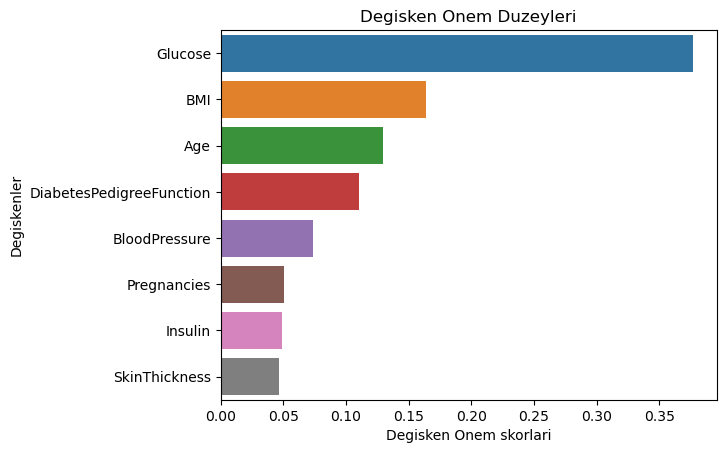

In [49]:
#degisken onem duzeyleri

feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index = X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y = feature_imp.index)
plt.xlabel("Degisken Onem skorlari")
plt.ylabel("Degiskenler")
plt.title("Degisken Onem Duzeyleri")
plt.show()              